## Multiple Linear Regression from Scratch

In [58]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [47]:
# Loading the dataframe
df = pd.read_csv('energy.txt')
df.head()

,T,V,AP,RH,EP
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       7176 non-null   float64
 1   V       7176 non-null   float64
 2   AP      7176 non-null   float64
 3   RH      7176 non-null   float64
 4   EP      7176 non-null   float64
dtypes: float64(5)
memory usage: 280.4 KB


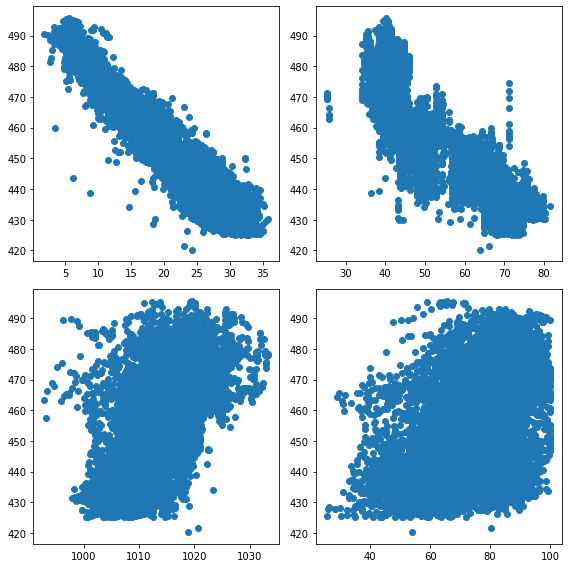

In [53]:
# Here out target variable is EP. So we will plot graphs corresponding to each feature
# plt.figure(figsize=(20, 20))
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig.figsize = (10, 10)
ax[0, 0].scatter(df['T'], df['EP'])
ax[0, 1].scatter(df['V'], df['EP'])
ax[1, 0].scatter(df['AP'], df['EP'])
ax[1, 1].scatter(df['RH'], df['EP'])

plt.tight_layout()

In [144]:
# Seperate features and target variable
X = df.iloc[:, :4]
y = df.iloc[:, -1]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Dividing the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [146]:
# Printing the size of datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5382, 4) (1794, 4) (5382,) (1794,)


In [224]:
def cost_function(X, y, w, b):
    """
    Parameters:
    X: features
    y: target values
    w: weights
    b: bias
    
    Returns:
    cost: cost with current weights and bias
    """
    cost = np.sum((((X.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

In [236]:
def gradient_descent_function(X, y, w, b, alpha=0.01, epochs=1000):
    """
    Parameters:
    X: features
    y: target values
    w: initial weights
    b: initial bias
    alpha: learning rate
    epochs: number of iterations
    
    Returns:
    costs: cost per epoch
    w: finalised weights
    b: finalised bias
    """
    m = len(y)
    costs = [0] * epochs
    
    for epoch in range(epochs):
        # Calculate the value -- Forward Propagation
        z = X.dot(w) + b
        
        # Calculate the losses
        loss = z - y
        
        # Calculate gradient descent
        weight_gradient = X.T.dot(loss) / m
        bias_gradient = np.sum(loss) / m
        
        # Update weights and bias
        w = w - alpha*weight_gradient
        b = b - alpha*bias_gradient
        
        # Store current lost
        cost = cost_function(X, y, w, b)
        costs[epoch] = cost
        
    return w, b, costs

In [245]:
w = np.random.randn(X_train.shape[1])
b = 0
newW, newB, cost_history = gradient_descent_function(X_train, y_train, w, b);
# print(X_train.shape)

In [246]:
newB

454.3438189466788

In [247]:
newW

array([-14.95657392,  -2.87370181,   0.35051616,  -2.35139308])

In [206]:
from sklearn.linear_model import LinearRegression

In [207]:
m = LinearRegression()
m.fit(X_train, y_train)
print(m.coef_)
print(m.intercept_)

[-14.95685865  -2.87349112   0.35046583  -2.3514856 ]
454.34381898777883
